# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [21]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/Part01'

### 之前做過的處理

In [22]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [23]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
app_train['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

AMT_CREDIT min :  45000.0
AMT_CREDIT max :  4050000.0


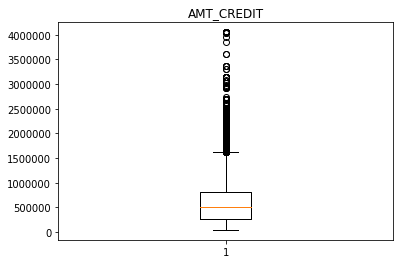

In [26]:
#對貸款金額感到有興趣 AMT_CREDIT
print('AMT_CREDIT min : ',app_train['AMT_CREDIT'].min())
print('AMT_CREDIT max : ',app_train['AMT_CREDIT'].max())
plt.boxplot(app_train['AMT_CREDIT'][~app_train['AMT_CREDIT'].isnull()])
plt.title('AMT_CREDIT')    
plt.show()

In [51]:
app_train["equal_width_AMT_CREDIT"] = pd.qcut( app_train['AMT_CREDIT'], q=10)
app_train["equal_width_AMT_CREDIT"].value_counts()



(604152.0, 755190.0]      34066
(44999.999, 180000.0]     33204
(180000.0, 254700.0]      31721
(432000.0, 513531.0]      30826
(513531.0, 604152.0]      30726
(306306.0, 432000.0]      30707
(1133748.0, 4050000.0]    30593
(755190.0, 900000.0]      29958
(900000.0, 1133748.0]     28319
(254700.0, 306306.0]      27391
Name: equal_width_AMT_CREDIT, dtype: int64

In [35]:
bin_rule = app_train["equal_width_AMT_CREDIT"].value_counts().index.tolist()
labels=['4.5-18','18-25.5','25.5-30.6','30.6-43.2','43.2-51.4','51.4-60.4','60.4-75.5','75.5-90','90-113.4','113.4-405']
app_train['AMT_CREDIT']=pd.cut( app_train['AMT_CREDIT'], bins=bin_rule, labels=labels )

import seaborn as sns
plt.figure(figsize=(15,6))
ax = sns.countplot(x="AMT_CREDIT", hue="TARGET", data=app_train)
#在每個bin都一樣多人的情況下, 可以看到51.4-60.4的呆帳比率可能較高

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

/anaconda3/envs/generic/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/envs/generic/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x576 with 0 Axes>

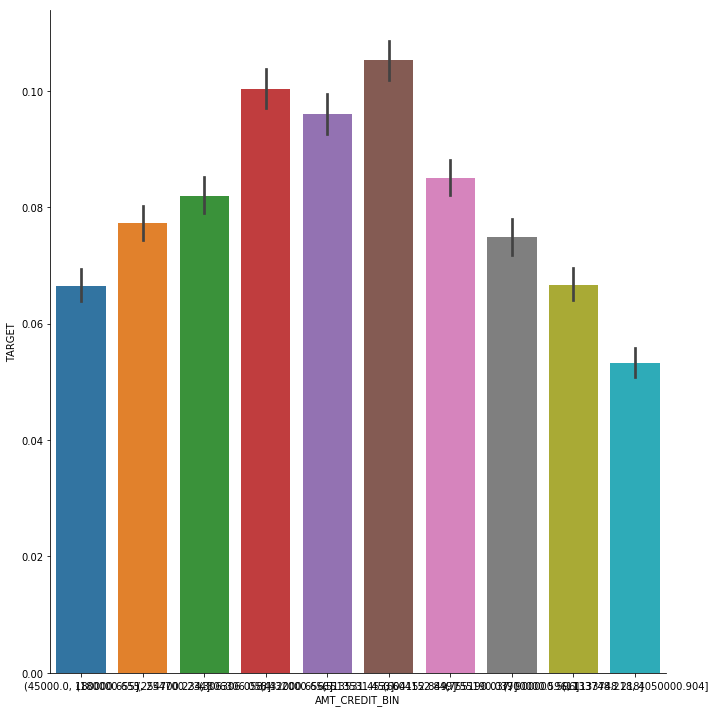

In [60]:
plt.figure(figsize=(14,8))
app_train['AMT_CREDIT_BIN'] = pd.qcut(app_train.AMT_CREDIT + np.random.random(len(app_train)), q=10)
sns.factorplot(x='AMT_CREDIT_BIN',y='TARGET',data=app_train, kind='bar', size=10)

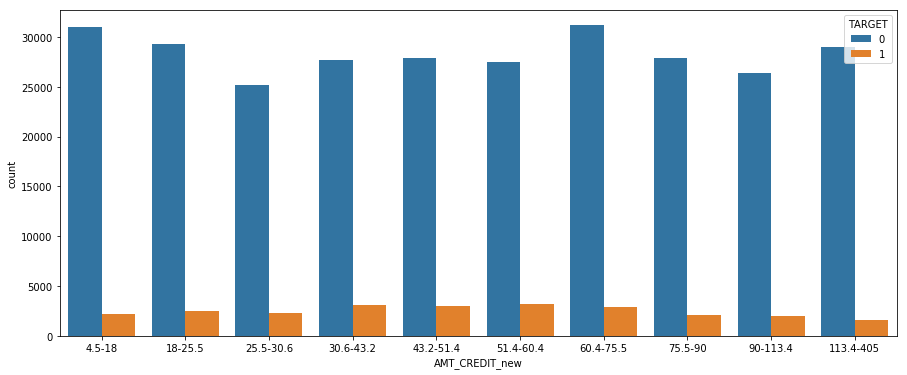

In [37]:
bin_rule = [44999.0,180000.0,254700.0,306306.0,432000.0,513531.0,604152.0,755190.0,900000.0,1133748.0,4050000.0]
labels=['4.5-18','18-25.5','25.5-30.6','30.6-43.2','43.2-51.4','51.4-60.4','60.4-75.5','75.5-90','90-113.4','113.4-405']
app_train['AMT_CREDIT_new']=pd.cut( app_train['AMT_CREDIT'], bins=bin_rule, labels=labels )

import seaborn as sns
plt.figure(figsize=(15,6))
ax = sns.countplot(x="AMT_CREDIT_new", hue="TARGET", data=app_train)
#在每個bin都一樣多人的情況下, 可以看到51.4-60.4的呆帳比率可能較高

In [ ]:
ax = sns.countplot(x="AMT_CREDIT",  data=app_train)

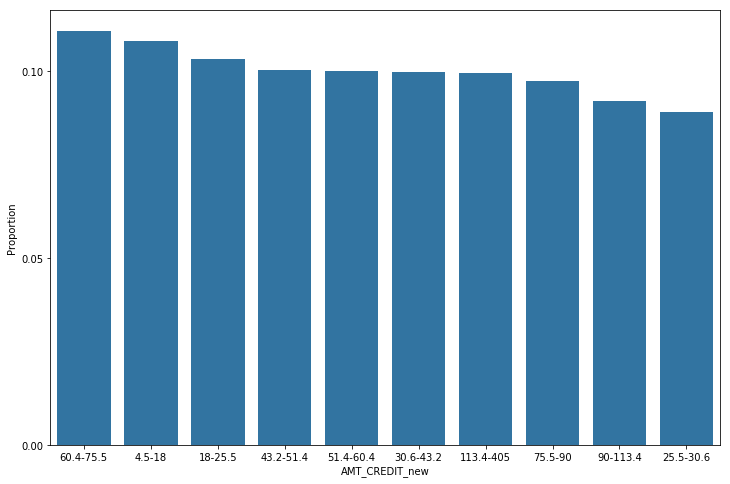

In [58]:
plt.figure(figsize=(12,8))
total = app_train.shape[0]
max_proportion = app_train['AMT_CREDIT_new'].value_counts().max() / total
ticks_count = np.arange(0, max_proportion, .05)
ticks_name = ['{:0.2f}'.format(v) for v in ticks_count]
#base_color = sns.color_palette()[0]
order = app_train['AMT_CREDIT_new'].value_counts().index
sns.countplot(data=app_train, x='AMT_CREDIT_new', color=base_color, order=order);
# 高度還是要按照原來的高度，不過刻度已經是計算過的
plt.yticks(ticks_count*total, ticks_name)
plt.ylabel('Proportion');